In [1]:
import pandas as pd 
import numpy as np

In [2]:
df = pd.read_csv("file.csv")

In [3]:
df.head()

,Date,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
0,2016-01-01,0.948024,434.33,0.005955,3.51,0.001748,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
1,2016-01-02,0.937124,433.44,0.006065,3.50,0.001741,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
2,2016-01-03,0.971905,430.01,0.006017,3.48,0.001744,562.00,1060.2,21914.400391,19033.710938,2035.4,32.96,2.87
3,2016-01-04,0.954480,433.09,0.005958,3.50,0.001748,544.20,1075.2,21327.119141,18450.980469,2009.1,32.37,2.77
4,2016-01-05,0.950176,431.96,0.006044,3.47,0.001721,535.75,1078.4,21188.720703,18374.000000,2011.7,32.89,2.75


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1827 entries, 0 to 1826
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1827 non-null   object 
 1   ETH        1827 non-null   float64
 2   BTC        1827 non-null   float64
 3   XRP        1827 non-null   float64
 4   LTC        1827 non-null   float64
 5   XLM        1827 non-null   float64
 6   Palladium  1827 non-null   float64
 7   Gold       1827 non-null   float64
 8   HSI        1827 non-null   float64
 9   N225       1827 non-null   float64
 10  SP500      1827 non-null   float64
 11  NVIDIA     1827 non-null   float64
 12  AMD        1827 non-null   float64
dtypes: float64(12), object(1)
memory usage: 185.7+ KB


In [9]:
df.describe()

,ETH,BTC,XRP,LTC,XLM,Palladium,Gold,HSI,N225,SP500,NVIDIA,AMD
count,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000,1827.000000
mean,241.212440,6131.373196,0.288848,57.071834,0.097929,1239.691653,1391.137110,25869.401140,20758.912143,2680.780460,200.687849,26.026719
std,231.644267,4732.385630,0.327973,53.838674,0.117155,573.601789,218.590348,3084.100808,2512.991016,424.863272,127.314333,22.978505
min,0.937124,364.330000,0.005112,3.000000,0.001444,469.800000,1060.200000,18319.580078,14952.019531,1824.500000,25.220000,1.800000
25%,46.590000,1187.840000,0.025938,7.360000,0.002868,788.400000,1251.700000,23754.459961,19282.159180,2359.600000,107.930000,10.920000
50%,194.870000,6416.310000,0.246065,48.210000,0.067262,1015.200000,1302.900000,26129.929688,21275.919922,2711.100000,179.740000,16.270000
75%,324.655000,9218.810000,0.335255,73.490000,0.122353,1619.100000,1487.800000,28187.865235,22594.029297,2941.300000,247.955000,32.720000
max,1396.420000,29001.720000,3.380000,358.340000,0.896227,2711.700000,2069.400000,33154.121094,27568.150391,3712.800000,582.480000,97.120000


In [10]:
counts = []
for col in df.columns:
    na_count = df[df[col].isna()].shape[0]
    counts.append(na_count)

pd.DataFrame(counts, index=df.columns, columns=['NA'])

,NA
Date,0
ETH,0
BTC,0
XRP,0
LTC,0
XLM,0
Palladium,0
Gold,0
HSI,0
N225,0



# Prepocessing : trasformazione del tipo di dati


In [12]:
df.dtypes

Date          object
ETH          float64
BTC          float64
XRP          float64
LTC          float64
XLM          float64
Palladium    float64
Gold         float64
HSI          float64
N225         float64
SP500        float64
NVIDIA       float64
AMD          float64
dtype: object

In [13]:
df['Date'] = pd.to_datetime(df['Date'],format = "%Y-%m-%d")

In [15]:
#df.dtypes

## Grafici preliminari


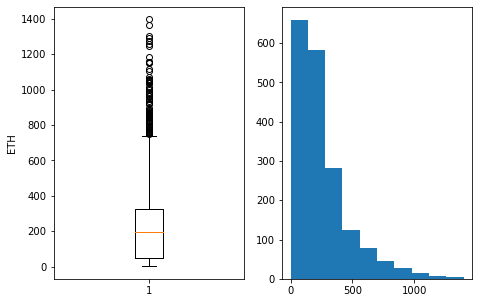

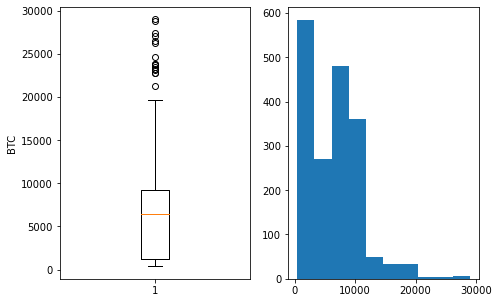

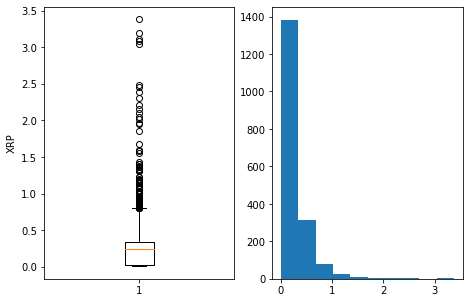

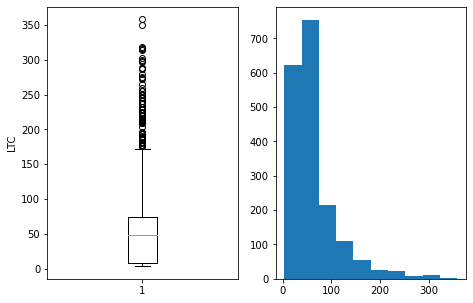

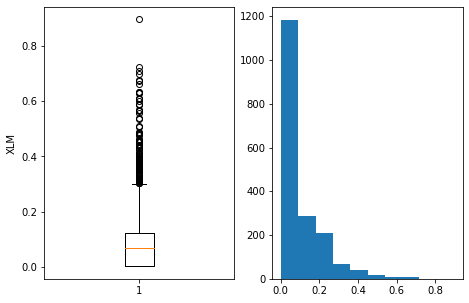

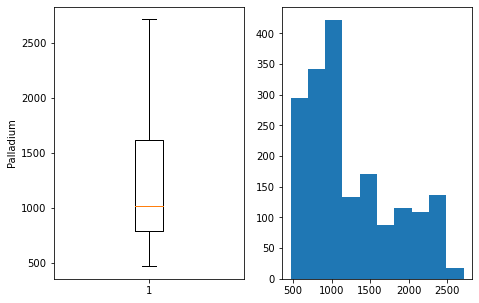

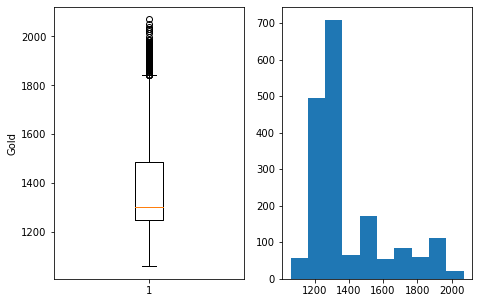

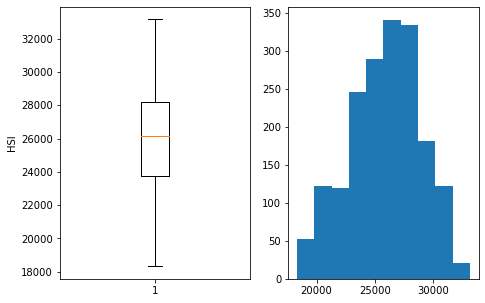

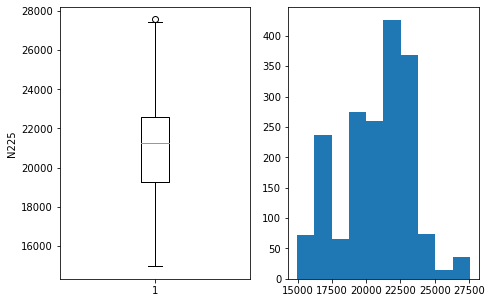

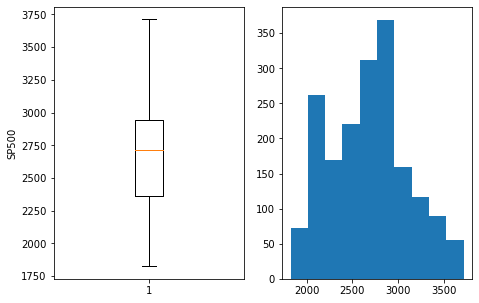

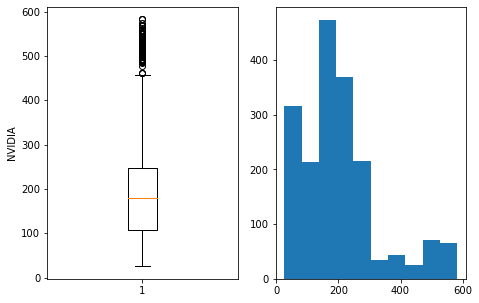

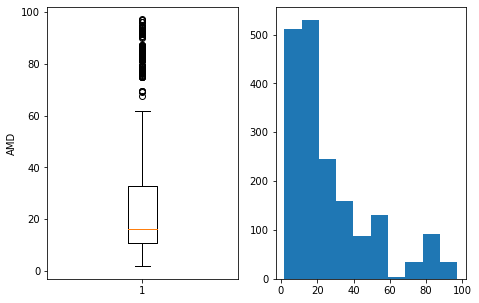

In [16]:
from matplotlib import pyplot as plt
x_axis = range(df.shape[0])

for col in df.columns:
    if df[col].dtypes == 'float64':
        not_na = df[df[col].notna()][col]
        plt.figure(figsize=(7.5, 5))
        plt.subplot(1, 2, 1)
        plt.ylabel(col)
        plt.boxplot(not_na)
        plt.subplot(1, 2, 2)
        plt.hist(not_na, bins=10)
        plt.show()